# Compare data from pre-optimized and optimized code to check speedup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

Speedup = time_old/time_new

In [2]:
pre_opt = LatticeData(datadir = "/data_omptest0/")
opt_1   = LatticeData(datadir = "/data_omptest1/")
opt_2   = LatticeData(datadir = "/data_omptest2/")

In [3]:
df_old = pre_opt.do_stats(therm = 0.4)
len_mask = df_old.index.get_level_values('length') < 40
nMC_mask = df_old.index.get_level_values('nMC') == 10000
ntherm_mask = df_old.index.get_level_values('ntherm') == 0
df_old = df_old[len_mask & nMC_mask & nMC_mask]
#df_old = df_old.dropna()
df_opt1 = opt_1.do_stats(therm = 0.4)
df_opt1["dt (min)"] = df_opt1["time (min)"] - df_old["time (min)"]
df_opt2 = opt_2.do_stats(therm = 0.4)
df_opt2["dt (min)"] = df_opt2["time (min)"] - df_old["time (min)"]

In [4]:
df_old.columns = pd.MultiIndex.from_product([df_old.columns, ['old']])
df_opt1.columns = pd.MultiIndex.from_product([df_opt1.columns, ['opt1']])
df_opt2.columns = pd.MultiIndex.from_product([df_opt2.columns, ['opt2']])

In [5]:
df_time = pd.concat([df_old,df_opt1,df_opt2])#,df_opt3,df_opt4,df_opt5,df_opt6])
df_time = df_time.stack()
df_time.index.set_names('version', level=len(df_time.index.names)-1, inplace=True)

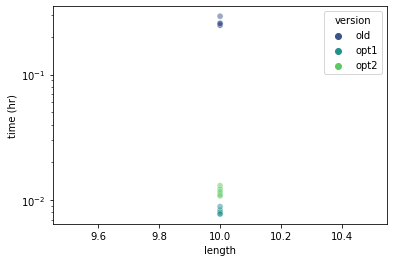

In [6]:
sns.scatterplot(data = df_time, x = "length", y = "time (hr)", hue = "version", 
                alpha = 0.5, palette = "viridis")
plt.yscale('log')
plt.show()

# Check Observables

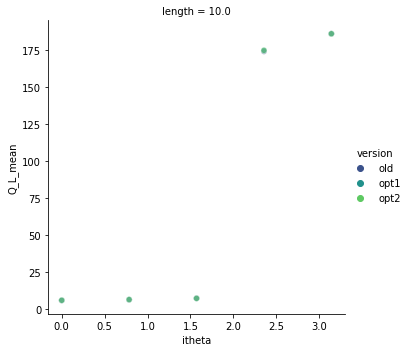

In [9]:
sns.relplot(data = df_time, x = "itheta", y = "Q_L_mean", hue = "version", 
                row = "length", alpha = 0.5, palette = "viridis")
#plt.yscale('log')
plt.show()

In [8]:
df_old.head()

|phi|_mean    Q_L_mean    A_L_mean  \
                                           old         old         old   
length itheta   beta nMC     ntherm                                      
10.0   0.000000 1.6  10000.0 0.0         100.0    5.986711 -536.749298   
       0.785398 1.6  10000.0 0.0         100.0    6.472555 -530.704884   
       1.570796 1.6  10000.0 0.0         100.0    7.464523 -521.060120   
       2.356194 1.6  10000.0 0.0         100.0  173.979089 -222.037824   
       3.141593 1.6  10000.0 0.0         100.0  185.881881 -222.493753   

                                       S_L_mean  Xi_L_mean F_LRe_mean  \
                                            old        old        old   
length itheta   beta nMC     ntherm                                     
10.0   0.000000 1.6  10000.0 0.0    -536.749298  68.679187  -2.838275   
       0.785398 1.6  10000.0 0.0    -535.788417  67.731968  -1.347277   
       1.570796 1.6  10000.0 0.0    -532.785366  64.249941   0.597243   
       2.356194 1.6  10000.0 0.0    -631.966396  -0.079876   0.284840   
       3.141593 1.6  10000.0 0.0    -806.458906   0.004373   0.193621   

                                    F_LIm_mean  acc_mean Q_L_ta A_L_ta  ...  \
                                           old       old    old    old  ...   
length itheta   beta nMC     ntherm                                     ...   
10.0   0.000000 1.6  10000.0 0.0     -4.758197  0.086238   35.0   35.0  ...   
       0.785398 1.6  10000.0 0.0     -4.501927  0.091180   47.0   45.0  ...   
       1.570796 1.6  10000.0 0.0     -0.701880  0.097969  317.0  148.0  ...   
       2.356194 1.6  10000.0 0.0      0.171655  0.065811  204.0   79.0  ...   
       3.141593 1.6  10000.0 0.0     -5.568226  0.043399   40.0   56.0  ...   

                                      acc_std corr_length_Re_std  \
                                          old                old   
length itheta   beta nMC     ntherm                                
10.0   0.000000 1.6  10000.0 0.0     0.000299           2.126973   
       0.785398 1.6  10000.0 0.0     0.000423           1.190363   
       1.570796 1.6  10000.0 0.0     0.000495           1.173359   
       2.356194 1.6  10000.0 0.0     0.000148           1.572865   
       3.141593 1.6  10000.0 0.0     0.000304           1.179154   

                                    corr_length_Im_std F_Re_py_std  \
                                                   old         old   
length itheta   beta nMC     ntherm                                  
10.0   0.000000 1.6  10000.0 0.0              0.961231         0.0   
       0.785398 1.6  10000.0 0.0              0.453435         0.0   
       1.570796 1.6  10000.0 0.0              1.649387         0.0   
       2.356194 1.6  10000.0 0.0              2.025444         0.0   
       3.141593 1.6  10000.0 0.0              2.439978         0.0   

                                    F_Im_py_std mass_gap_Re_std  \
                                            old             old   
length itheta   beta nMC     ntherm                               
10.0   0.000000 1.6  10000.0 0.0            0.0        0.033285   
       0.785398 1.6  10000.0 0.0            0.0        0.026444   
       1.570796 1.6  10000.0 0.0            0.0        0.010115   
       2.356194 1.6  10000.0 0.0            0.0        0.404346   
       3.141593 1.6  10000.0 0.0            0.0        0.468879   

                                    mass_gap_Im_std time (sec) time (min)  \
                                                old        old        old   
length itheta   beta nMC     ntherm                                         
10.0   0.000000 1.6  10000.0 0.0           0.021682      890.0  14.833333   
       0.785398 1.6  10000.0 0.0           0.041185     1047.0  17.450000   
       1.570796 1.6  10000.0 0.0           0.013613      890.0  14.833333   
       2.356194 1.6  10000.0 0.0           0.409955      918.0  15.300000   
       3.141593 1.6  10000.0 0.0           